In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc dữ liệu
data = pd.read_csv('../datas/train_div10.csv')
data_test = pd.read_csv('../datas/test_div10.csv')

In [2]:
import sys
sys.path.append('../extraction')  

from extraction import (
    create_training_data,
    calculate_accelerometer_features,
    calculate_accelerometer_fft_features,
    create_training_data_NN_like_micro
)

x_list, y_list, z_list, train_labels = create_training_data(
    data=data, window_size=20, step_size=5)



x_list_test, y_list_test, z_list_test, train_labels_test = create_training_data(
    data=data_test, window_size=20, step_size=5)


In [3]:
features = calculate_accelerometer_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=20)
# test
features_test = calculate_accelerometer_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=20)

c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:102: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['x_skewness'] = [stats.skew(x) for x in x_list]
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:103: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['y_skewness'] = [stats.skew(y) for y in y_list]
c:\Users\Admin\Desktop\Master_2024\new_sleep_posture_2025\train\../extraction\extraction.py:104: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['z_skewness'] = [stats.skew(z) for z in z_list]
c:\Users\Admin\Desktop

In [4]:
features = features[["z_median","z_mean","x_mean","x_energy", "z_pos_count",
                            "z_neg_count","x_median", 'z_energy', 'avg_result_accl',
                            'x_neg_count', 'z_std', 'x_pos_count',"y_energy","y_mean","sma", 'y_median'
                            ]]


features_test = features_test[["z_median","z_mean","x_mean","x_energy", "z_pos_count",
                            "z_neg_count","x_median", 'z_energy', 'avg_result_accl',
                            'x_neg_count', 'z_std', 'x_pos_count',"y_energy","y_mean","sma", 'y_median'
                            ]]


In [5]:
features_all = pd.concat([features ], axis=1)
features_all_test = pd.concat([features_test], axis=1)

In [6]:
# Kiểm tra có bao nhiêu giá trị NaN
print("🔍 Số NaN trong mỗi cột:")
print(features_all.isna().sum().sort_values(ascending=False).head(10))

🔍 Số NaN trong mỗi cột:
z_median           0
z_mean             0
x_mean             0
x_energy           0
z_pos_count        0
z_neg_count        0
x_median           0
z_energy           0
avg_result_accl    0
x_neg_count        0
dtype: int64


In [7]:
features_all = features_all.fillna(features_all.mean())
features_all_test = features_all_test.fillna(features_all_test.mean())

🌲 Training Random Forest (optimized)...
🎯 Test Accuracy: 0.9909
              precision    recall  f1-score   support

           1       1.00      0.99      0.99      5731
           2       0.97      1.00      0.98      1610
           3       0.99      1.00      0.99      4831
           4       0.99      0.91      0.95       480

    accuracy                           0.99     12652
   macro avg       0.99      0.97      0.98     12652
weighted avg       0.99      0.99      0.99     12652



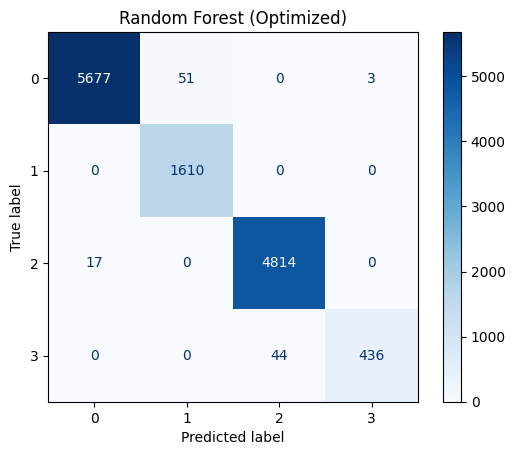

In [8]:
from models import train_RF
modelRF = train_RF(features_all, features_all_test, train_labels, train_labels_test)


📈 Training Logistic Regression (optimized)...
🔍 Mẫu dòng đầu tiên (sau fit scaler):
z_median            0.709000
z_mean              0.731450
x_mean              0.013950
x_energy            0.010229
z_pos_count        20.000000
z_neg_count         0.000000
x_median           -0.041000
z_energy            0.537071
avg_result_accl     0.949794
x_neg_count        15.000000
z_std               0.045301
x_pos_count         5.000000
y_energy            0.354838
y_mean              0.591800
sma                 1.402800
y_median            0.626000
Name: 0, dtype: float64
🔍 Ma trận sau khi chuẩn hóa:
[[ 0.9462838   0.98148701 -0.00842769 -0.91737662  0.97136751 -0.97029641
  -0.09626208  0.29511473 -0.0789824   0.51678957  1.01750729 -0.51200196
   1.90946911  1.66883061  0.75325507  1.79490354]
 [ 0.9462838   0.96478318 -0.10917016 -0.93668084  0.97136751 -0.97029641
  -0.09950079  0.24513405 -0.19476385  1.03390934  0.24119847 -1.02971292
   2.02468916  1.72962799  0.58394894  1.79490354]
 

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.0011531100288712302. Increase the number of iterations.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.000760961451709922. Increase the number of iterations.
  warnings.warn(



              precision    recall  f1-score   support

           1       1.00      0.93      0.96      5731
           2       0.85      1.00      0.92      1610
           3       0.97      1.00      0.98      4831
           4       1.00      0.98      0.99       480

    accuracy                           0.97     12652
   macro avg       0.95      0.98      0.96     12652
weighted avg       0.97      0.97      0.97     12652



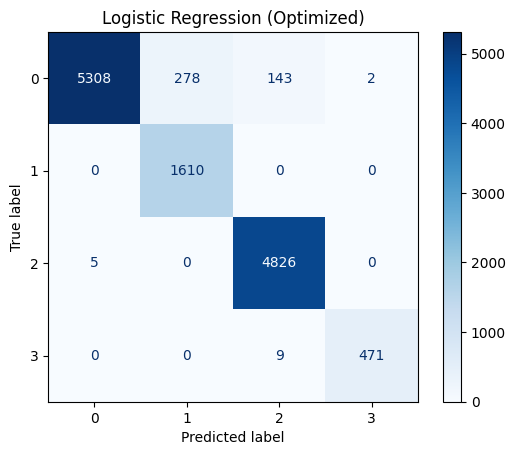

In [9]:
from models import train_LR
modelLR, scalerLr = train_LR(features_all, features_all_test, train_labels, train_labels_test)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


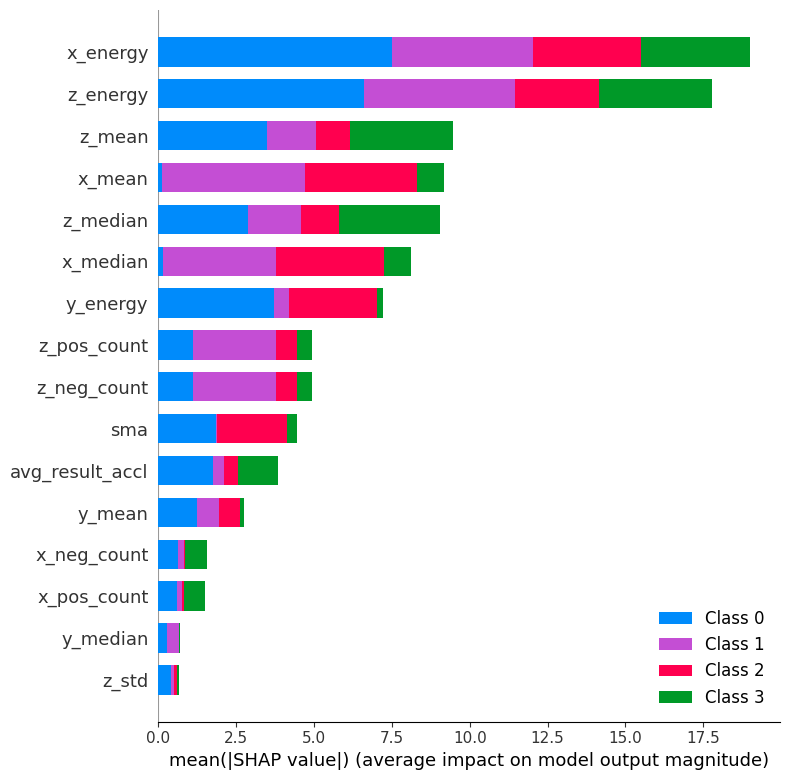

In [10]:
import shap
import pandas as pd

# ⚙️ Bước 1: Đảm bảo features_all là DataFrame có tên cột
# (bạn đã làm đúng ở trên với features và features_fft)
# ⚠️ Tuy nhiên sau khi chuẩn hóa, cần gắn lại tên cột:
X_scaled = scalerLr.transform(features_all)
X_scaled = pd.DataFrame(X_scaled, columns=features_all.columns)

# ⚙️ Bước 2: Tạo LinearExplainer
explainer = shap.LinearExplainer(modelLR, X_scaled, feature_names=features_all.columns)

# ⚙️ Bước 3: Tính SHAP values
shap_values = explainer.shap_values(X_scaled)

# ⚙️ Bước 4: Vẽ biểu đồ SHAP
shap.summary_plot(shap_values, X_scaled, plot_type="bar", max_display=50)

💡 Training SVM (optimized)...
🎯 Test Accuracy: 0.9656
              precision    recall  f1-score   support

           1       1.00      0.93      0.96      5731
           2       0.91      1.00      0.95      1610
           3       0.95      1.00      0.97      4831
           4       0.99      0.98      0.99       480

    accuracy                           0.97     12652
   macro avg       0.96      0.98      0.97     12652
weighted avg       0.97      0.97      0.97     12652



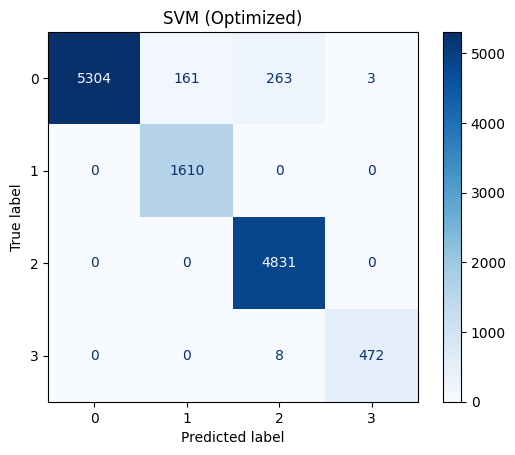

In [11]:
from models import train_SVM
modelSVM, scalerSVM = train_SVM(features_all, features_all_test, train_labels, train_labels_test)

🔥 Training Gradient Boosting (optimized)...
🎯 Test Accuracy: 0.9885
              precision    recall  f1-score   support

           1       1.00      0.98      0.99      5731
           2       0.93      1.00      0.97      1610
           3       1.00      1.00      1.00      4831
           4       0.99      0.97      0.98       480

    accuracy                           0.99     12652
   macro avg       0.98      0.99      0.98     12652
weighted avg       0.99      0.99      0.99     12652



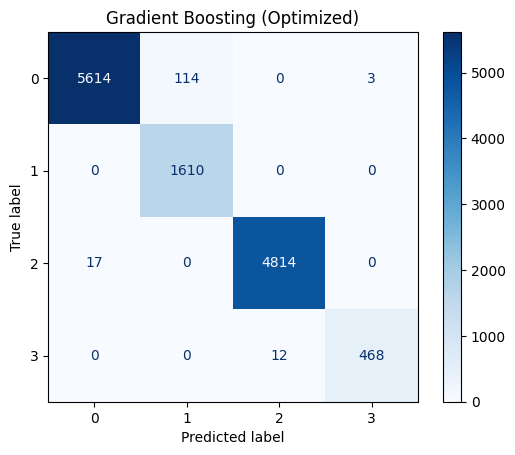

In [12]:
from models import train_GB
modelGB, scalerGB = train_GB(features_all, features_all_test, train_labels, train_labels_test)


In [13]:
from optimation import get_model_size_kb

get_model_size_kb(modelRF, None, "RandomForest")
get_model_size_kb(modelLR, scalerLr, "LogisticRegression")
get_model_size_kb(modelSVM, scalerSVM, "SVM")
get_model_size_kb(modelGB, None, "GradientBoosting")

📦 RandomForest: Model = 46.79 KB | Scaler = 0.00 KB | Total = 46.79 KB
🌲  → Tổng số nút trong mô hình cây: 392
----------------------------------------------------------------------
📦 LogisticRegression: Model = 1.40 KB | Scaler = 1.51 KB | Total = 2.90 KB
🔢  → Số tham số huấn luyện: 68
----------------------------------------------------------------------
📦 SVM: Model = 10.03 KB | Scaler = 1.51 KB | Total = 11.54 KB
🔢  → Số tham số huấn luyện: 102
----------------------------------------------------------------------
📦 GradientBoosting: Model = 130.40 KB | Scaler = 0.00 KB | Total = 130.40 KB
🌲  → Tổng số nút trong mô hình cây: 1144
----------------------------------------------------------------------


130.4033203125